In [23]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
import time
import matplotlib.pyplot as plt

In [24]:
data=pd.read_csv("df_mix.csv")
data

,DateTime,RealPower,mes,verano,primavera,otoño,invierno,dia,vacaciones,clases_verano,Hay_Sol,temp
0,2019-12-31 23:45:00,38.394,12.0,0.0,0.0,0.0,1.0,31.0,1.0,0.0,0,8.89
1,2019-12-31 23:30:00,38.619,12.0,0.0,0.0,0.0,1.0,31.0,1.0,0.0,0,8.89
2,2019-12-31 23:15:00,38.577,12.0,0.0,0.0,0.0,1.0,31.0,1.0,0.0,0,8.89
3,2019-12-31 23:00:00,38.493,12.0,0.0,0.0,0.0,1.0,31.0,1.0,0.0,0,8.89
4,2019-12-31 22:45:00,38.313,12.0,0.0,0.0,0.0,1.0,31.0,1.0,0.0,0,8.89
...,...,...,...,...,...,...,...,...,...,...,...,...
26395,2019-04-01 01:00:00,51.912,4.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,16.10
26396,2019-04-01 00:45:00,50.980,4.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,16.10
26397,2019-04-01 00:30:00,51.873,4.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,16.10
26398,2019-04-01 00:15:00,51.186,4.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,16.10


In [25]:
from datetime import datetime

data['timestamp_numeric'] = data['DateTime'].apply(lambda x: int(datetime.strptime(x, "%Y-%m-%d %H:%M:%S").timestamp()))

**december**

In [26]:
df_2019_dec=pd.DataFrame()

for i in range(len(data)):
    if i <= 2975:
        df_2019_dec = pd.concat([df_2019_dec, data.iloc[[i]]])

df_2019_dec

,DateTime,RealPower,mes,verano,primavera,otoño,invierno,dia,vacaciones,clases_verano,Hay_Sol,temp,timestamp_numeric
0,2019-12-31 23:45:00,38.394,12.0,0.0,0.0,0.0,1.0,31.0,1.0,0.0,0,8.89,1577861100
1,2019-12-31 23:30:00,38.619,12.0,0.0,0.0,0.0,1.0,31.0,1.0,0.0,0,8.89,1577860200
2,2019-12-31 23:15:00,38.577,12.0,0.0,0.0,0.0,1.0,31.0,1.0,0.0,0,8.89,1577859300
3,2019-12-31 23:00:00,38.493,12.0,0.0,0.0,0.0,1.0,31.0,1.0,0.0,0,8.89,1577858400
4,2019-12-31 22:45:00,38.313,12.0,0.0,0.0,0.0,1.0,31.0,1.0,0.0,0,8.89,1577857500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2971,2019-12-01 01:00:00,39.238,12.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0,9.44,1575187200
2972,2019-12-01 00:45:00,39.165,12.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0,9.44,1575186300
2973,2019-12-01 00:30:00,38.993,12.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0,9.44,1575185400
2974,2019-12-01 00:15:00,38.918,12.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0,9.44,1575184500


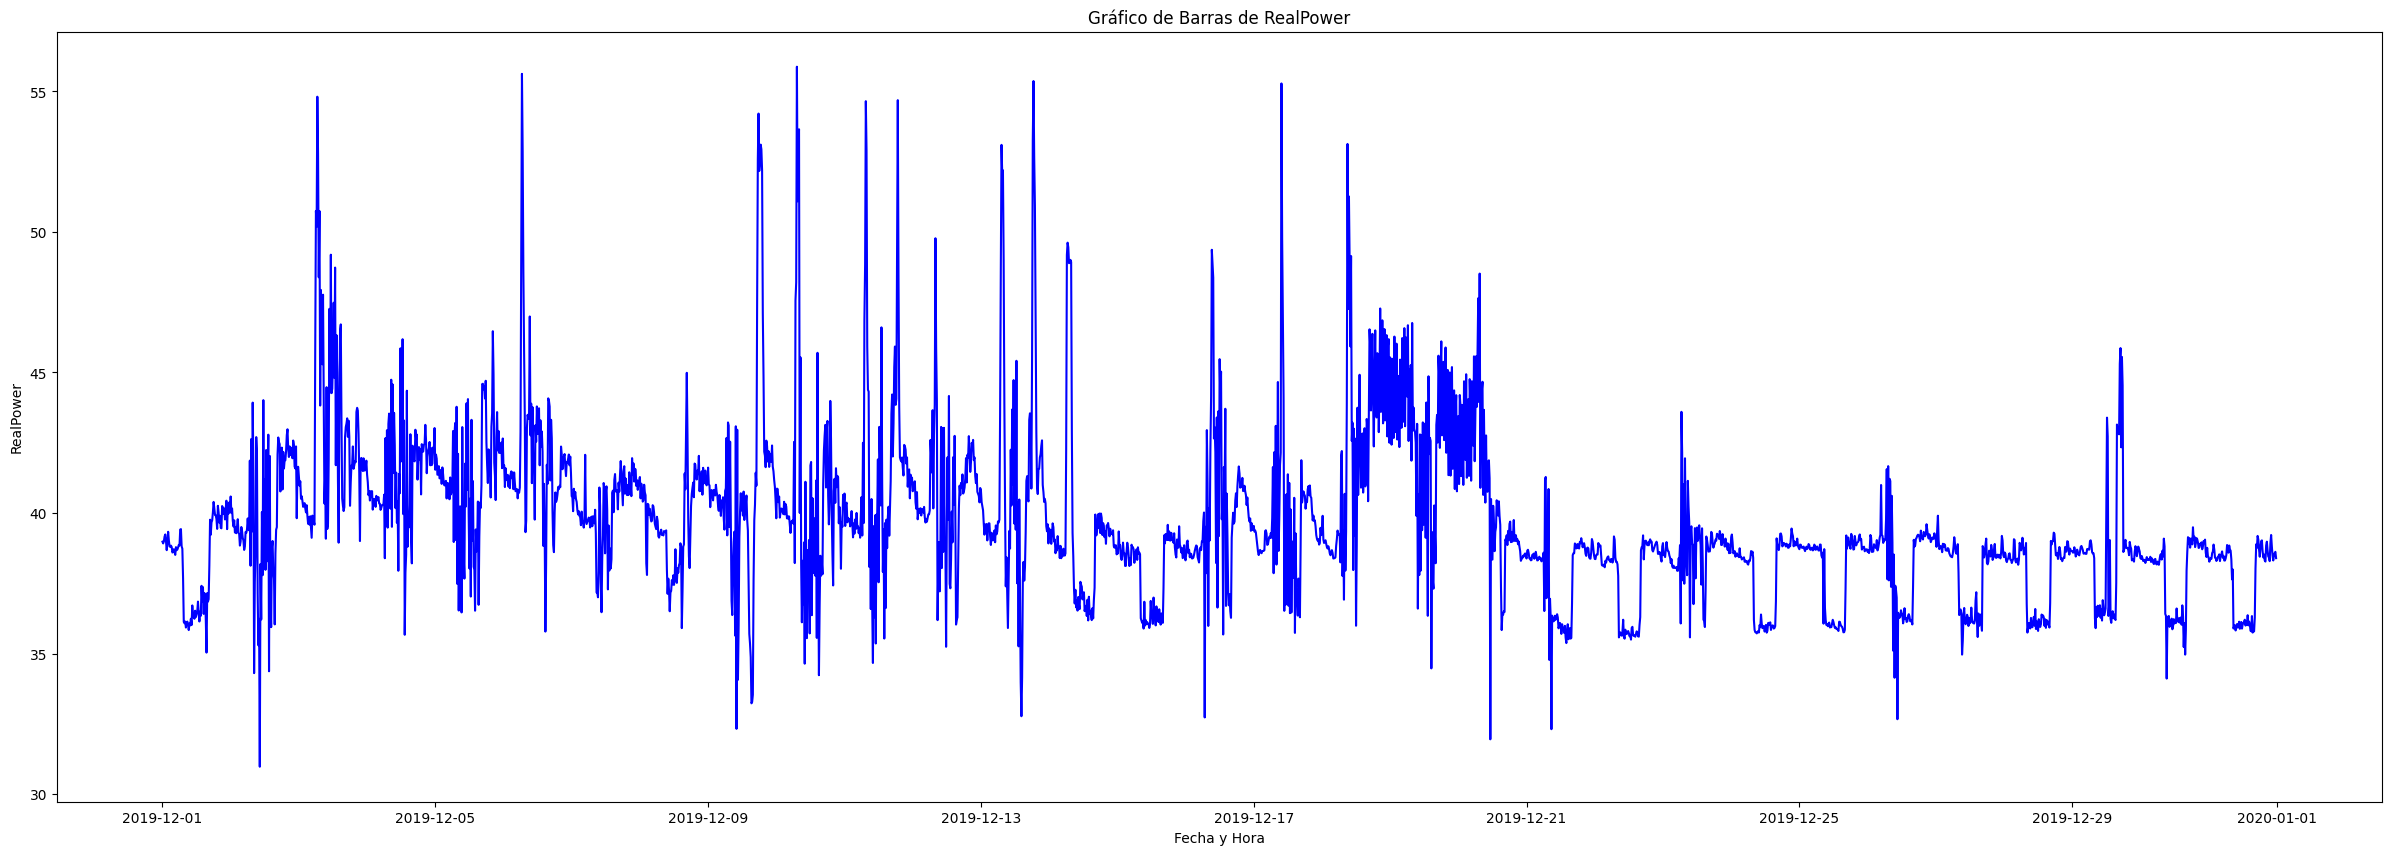

In [28]:
df_2019_dec["DateTime"]=pd.to_datetime(df_2019_dec["DateTime"])

plt.figure(figsize=(30, 10))
plt.plot(df_2019_dec['DateTime'], df_2019_dec['RealPower'], color='blue')
plt.title('Gráfico de Barras de RealPower')
plt.xlabel('Fecha y Hora')
plt.ylabel('RealPower')

plt.show()

In [31]:
total_filas = df_2019_dec.shape[0]

porcentaje_entrenamiento = 0.8

# Calcula el número de filas para entrenamiento y prueba
num_filas_entrenamiento = int(total_filas * porcentaje_entrenamiento)
num_filas_prueba = total_filas - num_filas_entrenamiento

# Divide los datos
X_train = df_2019_dec[["mes", "verano", "primavera", "otoño", "invierno", "dia", "vacaciones", "clases_verano", "Hay_Sol", "temp", "timestamp_numeric"]][:num_filas_entrenamiento]
Y_train = df_2019_dec["RealPower"][:num_filas_entrenamiento]
X_test = df_2019_dec[["mes", "verano", "primavera", "otoño", "invierno", "dia", "vacaciones", "clases_verano", "Hay_Sol", "temp", "timestamp_numeric"]][num_filas_entrenamiento:]
Y_test = df_2019_dec["RealPower"][num_filas_entrenamiento:]

print('Train set:', X_train.shape, Y_train.shape)
print('Test set:', X_test.shape, Y_test.shape)

Train set: (2380, 11) (2380,)
Test set: (596, 11) (596,)


In [35]:
X_train_array = X_train.to_numpy()
Y_train_array = Y_train.to_numpy()

# Creating a DataFrame from the NumPy arrays
df= pd.DataFrame({
    "mes": X_train_array[:, 0],
    "verano": X_train_array[:, 1],
    "primavera": X_train_array[:, 2],
    "otoño": X_train_array[:, 3],
    "invierno": X_train_array[:, 4],
    "dia": X_train_array[:, 5],
    "vacaciones": X_train_array[:, 6],
    "clases_verano": X_train_array[:, 7],
    "Hay_Sol": X_train_array[:, 8],
    "temp": X_train_array[:, 9],
    "timestamp_numeric": X_train_array[:, 10],
    "RealPower": Y_train_array.flatten()
})

In [36]:
s1=MinMaxScaler(feature_range=(-1,1))
Xs=s1.fit_transform(df[["mes", "verano", "primavera", "otoño", "invierno", "dia", "vacaciones", "clases_verano", "Hay_Sol", "temp","timestamp_numeric"]])

s2=MinMaxScaler(feature_range=(-1,1))
Ys=s2.fit_transform(df[["RealPower"]])

window=70
X=[]
Y=[]
for i in range(window, len(Xs)):
    X.append(Xs[i-window:i,:])
    Y.append(Ys[i])
X,Y=np.array(X), np.array(Y)


In [37]:
model=Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 11)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer="adam", loss="mean_squared_error",
              metrics=["accuracy", ])

es=EarlyStopping(monitor="loss", mode="min",
                 verbose=1, patience=10)

t0=time.time()

history=model.fit(X,Y,epochs=10,batch_size=250,
                  callbacks=[es], verbose=1)

t1=time.time()

print("Runtime:%.2f s" % (t1-t0))

Epoch 1/10
10/10 [==============================] - 13s 326ms/step - loss: 0.0762 - accuracy: 0.0000e+00
Epoch 2/10
10/10 [==============================] - 3s 348ms/step - loss: 0.0538 - accuracy: 0.0000e+00
Epoch 3/10
10/10 [==============================] - 3s 305ms/step - loss: 0.0523 - accuracy: 0.0000e+00
Epoch 4/10
10/10 [==============================] - 3s 338ms/step - loss: 0.0506 - accuracy: 0.0000e+00
Epoch 5/10
10/10 [==============================] - 4s 374ms/step - loss: 0.0500 - accuracy: 0.0000e+00
Epoch 6/10
10/10 [==============================] - 3s 354ms/step - loss: 0.0494 - accuracy: 0.0000e+00
Epoch 7/10
10/10 [==============================] - 3s 326ms/step - loss: 0.0494 - accuracy: 0.0000e+00
Epoch 8/10
10/10 [==============================] - 4s 401ms/step - loss: 0.0493 - accuracy: 0.0000e+00
Epoch 9/10
10/10 [==============================] - 5s 476ms/step - loss: 0.0488 - accuracy: 0.0000e+00
Epoch 10/10
10/10 [==============================] - 4s 402ms/s

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


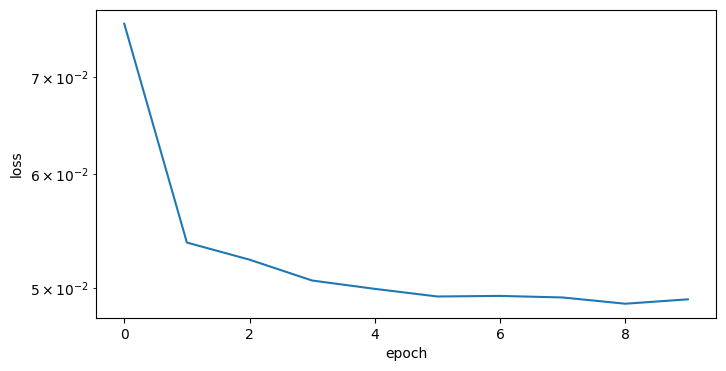

In [38]:
plt.figure(figsize=(8,4))
plt.semilogy(history.history["loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
model.save("model")

73/73 [==============================] - 5s 39ms/step


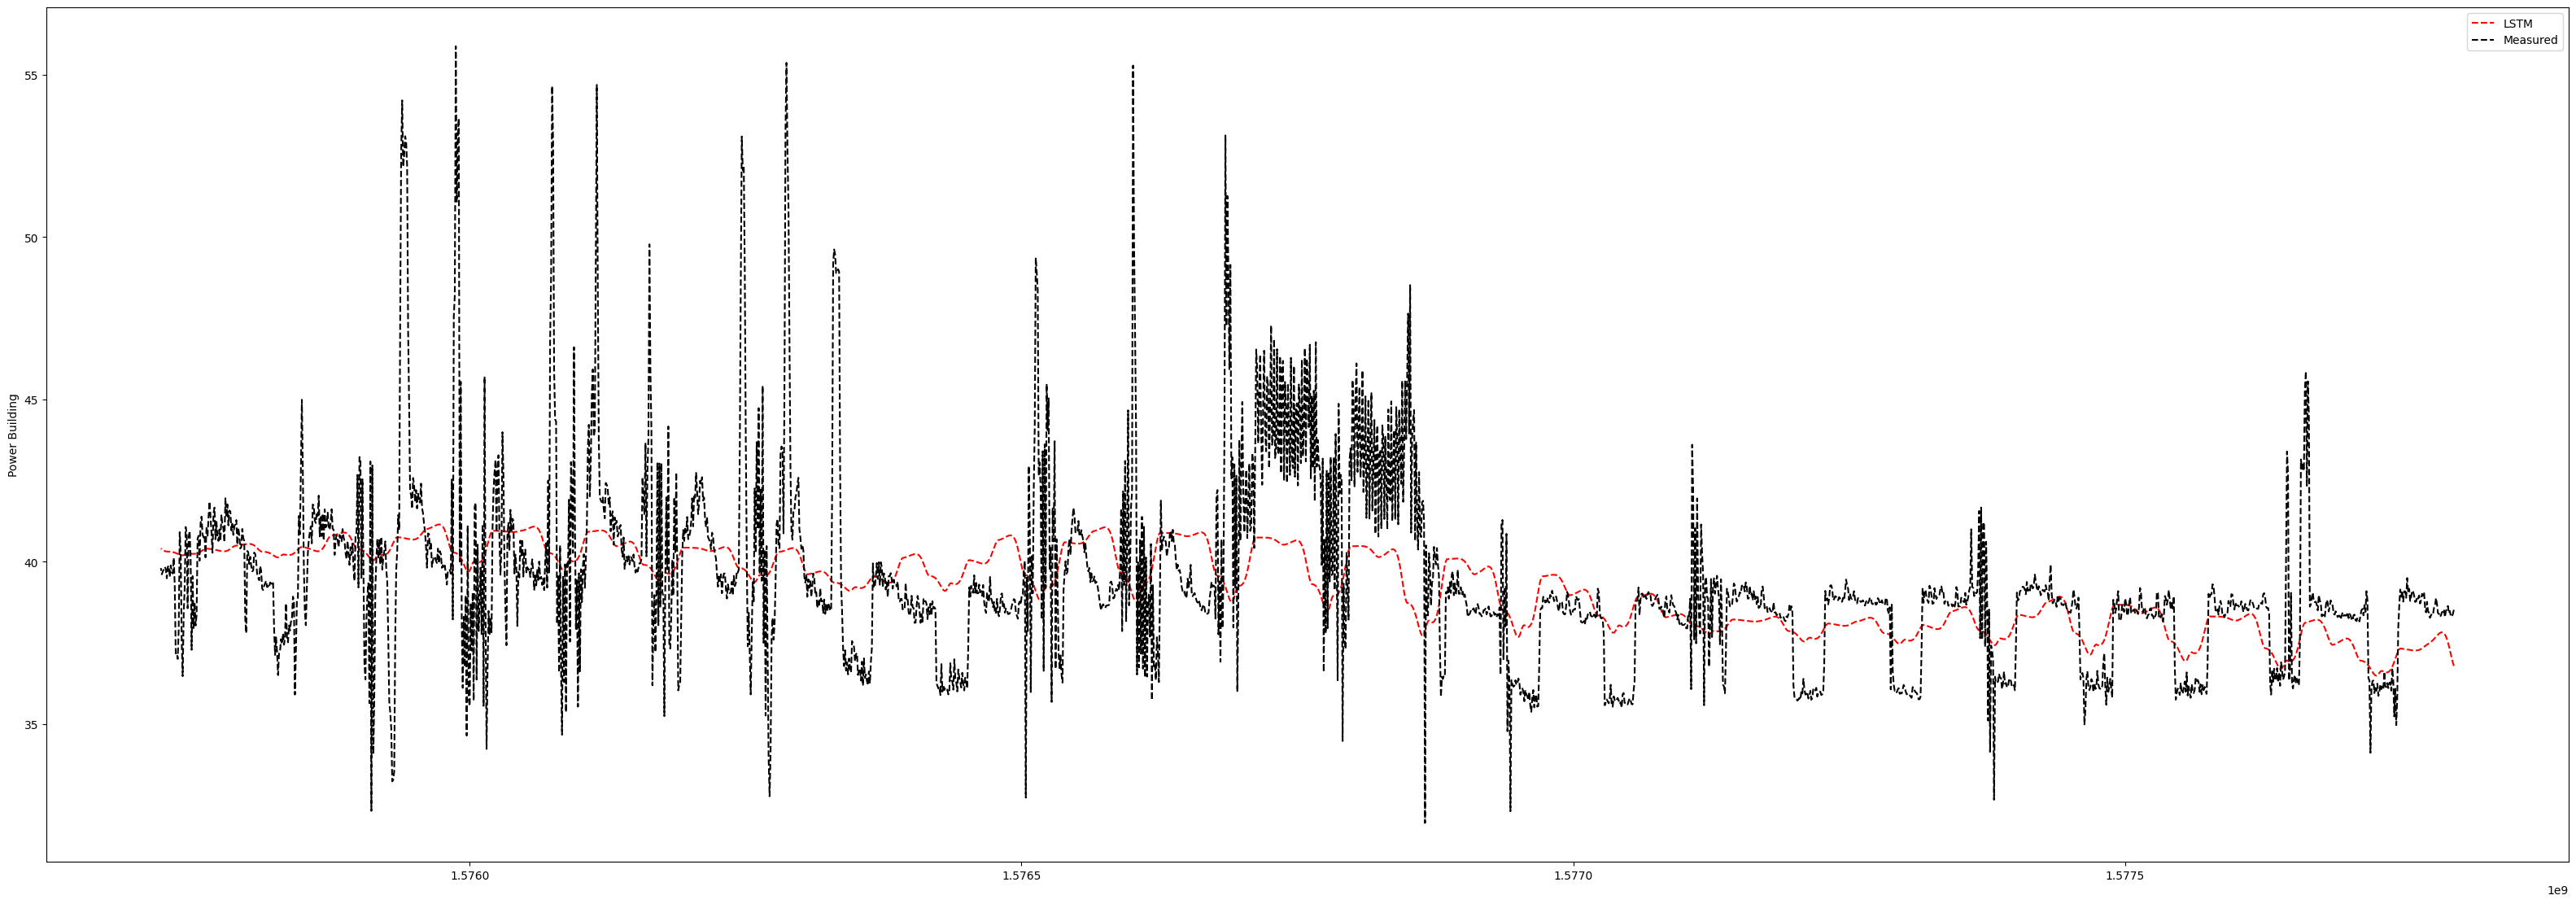

In [39]:
Yp=model.predict(X)

Yu=s2.inverse_transform(Yp)
Ym=s2.inverse_transform(Y)

plt.figure(figsize=(40,30))
plt.subplot(2,1,1)
plt.plot(df["timestamp_numeric"][window:], Yu, "r--", label="LSTM")
plt.plot(df["timestamp_numeric"][window:], Ym, "k--", label="Measured")
plt.ylabel("Power Building")
plt.legend()

In [41]:
v=load_model("model")

X_test_array = X_test.to_numpy()
Y_test_array = Y_test.to_numpy()

test = pd.DataFrame({
    "mes": X_test_array[:, 0],
    "verano": X_test_array[:, 1],
    "primavera": X_test_array[:, 2],
    "otoño": X_test_array[:, 3],
    "invierno": X_test_array[:, 4],
    "dia": X_test_array[:, 5],
    "vacaciones": X_test_array[:, 6],
    "clases_verano": X_test_array[:, 7],
    "Hay_Sol": X_test_array[:, 8],
    "temp": X_test_array[:, 9],
    "timestamp_numeric": X_test_array[:, 10],
    "RealPower": Y_test_array.flatten()
})

Xt=test[["mes", "verano", "primavera", "otoño", "invierno", "dia", "vacaciones", "clases_verano", "Hay_Sol", "temp","timestamp_numeric"]
].values
Yt=test[["RealPower"]].values



C:\Users\giuliana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\giuliana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [43]:
Xts=s1.transform(Xt)
Yts=s2.transform(Yt)


Yti=[]
Xti=[]

for i in range(window, len (Xts)):
    Xti.append(Xts[i-window:i,:])
    Yti.append(Yts[i])

Xti,Yti=np.array(Xti), np.array(Yti)


Ytp=model.predict(Xti)

Ytu=s2.inverse_transform(Ytp)
Ytm=s2.inverse_transform(Yti)


 1/17 [>.............................] - ETA: 0s

C:\Users\giuliana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\giuliana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


17/17 [==============================] - 1s 40ms/step


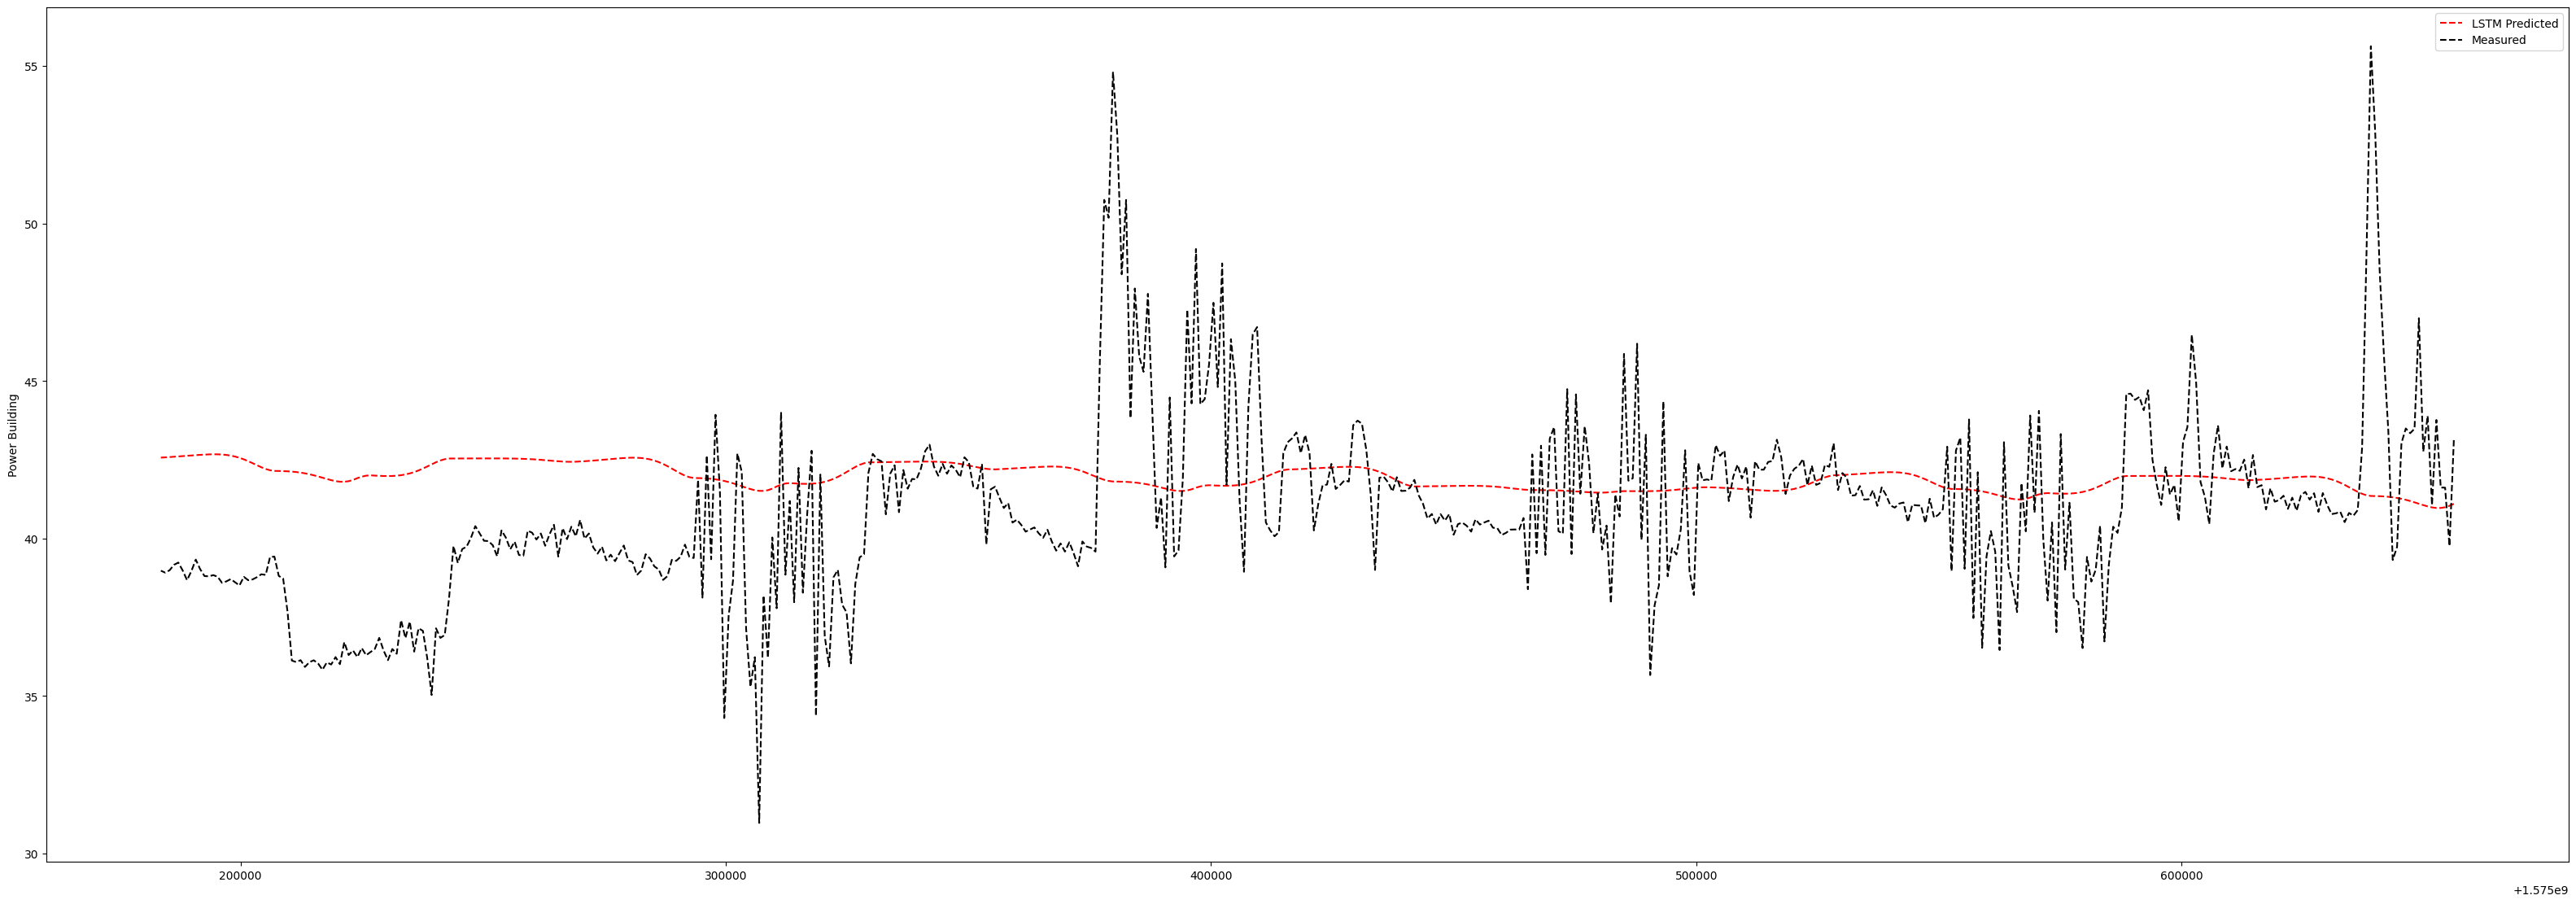

In [44]:
plt.figure(figsize=(40,30))
plt.subplot(2,1,1)
plt.plot(test["timestamp_numeric"][window:], Ytu, "r--", label="LSTM Predicted")
plt.plot(test["timestamp_numeric"][window:], Ytm, "k--", label="Measured")
plt.ylabel("Power Building")
plt.legend()